## Black Scholes Model for European Option
The black Scholes formula is the following:
$$
C(S,t) = N(d_1)S - N(d_2)Ke^{-r(T-t)}
$$
where
$$
d_1 = \frac{ln(S/K) + (r + \sigma^2/2)(T-t)}{\sigma\sqrt{T-t}}
$$
and
$$
d_2 = d_1 - \sigma\sqrt{T-t}
$$
and $N$ is the cumulative distribution function of the standard normal distribution.



In [3]:
# Black Scholes Model for European Call Option
# The functions we need are:
# 1. norm.cdf() for the cumulative distribution function for the standard normal distribution
# We can find these functions in the scipy.stats library
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Black Scholes Model for European Call Option

In [4]:
# We will define a function that will calculate the price of a European call option
# We will use the following parameters:
# S = spot price
# K = strike price
# T = time to maturity
# r = risk free rate
# sigma = volatility of the underlying asset

def call_option_price(S, K, T, r, sigma):
    # d1 and d2
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    # price of call option
    call_price = norm.cdf(d1)*S - norm.cdf(d2)*K*np.exp(-r*T)

    return call_price


In [5]:
# Let's try it out
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
call_price = call_option_price(S, K, T, r, sigma)
print('The price of the call option is: ', round(call_price, 2))


The price of the call option is:  12.34


### Black Scholes Model for European Put Option
Using the put-call parity, we can calculate the price of the put option using the price of the call option with the following formula:
$$
P(S,t) = C(S,t) - S + Ke^{-r(T-t)}
$$
where
$$
P(S,t) = \text{price of the put option}
$$
$$
C(S,t) = \text{price of the call option}
$$
$$
S = \text{spot price}
$$
$$
K = \text{strike price}
$$
$$
r = \text{risk free rate}
$$
$$
T = \text{time to maturity}
$$
$$
t = \text{time to expiration}
$$


In [11]:
def put_option_price(S, K, T, r, sigma):
    # price of put option
    put_price = call_option_price(S, K, T, r, sigma) - (S - K*np.exp(-r*T))

    return put_price


In [12]:
# Let's try it out
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
put_price = put_option_price(S, K, T, r, sigma)
print('The price of the put option is: ', round(put_price, 2))


The price of the put option is:  7.46


/var/folders/g2/h6dx2tv51p75lk87k_f463zr0000gn/T/ipykernel_35338/534781902.py:11: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))


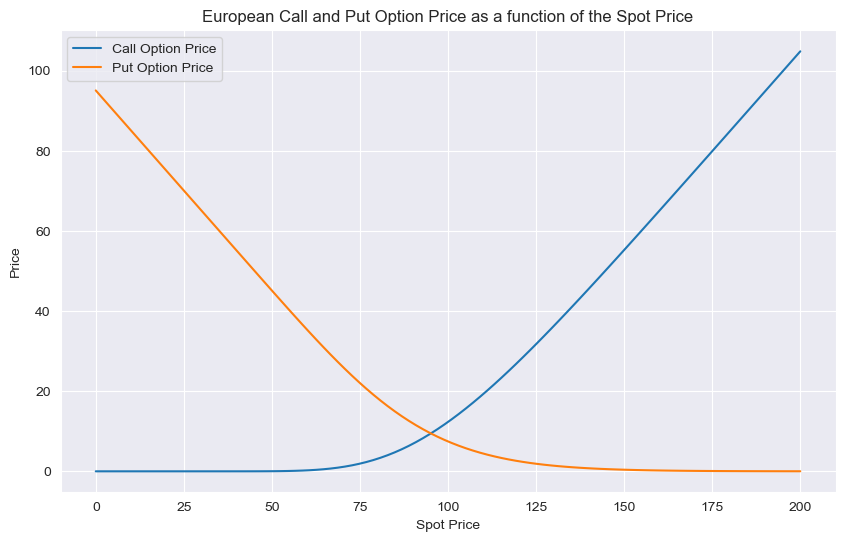

In [15]:
# Let's plot the price of the call option as a function of the strike price
K = 100
T = 1
r = 0.05
sigma = 0.25
spot_price = np.linspace(0, 200, 100)
call_price = call_option_price(spot_price, K, T, r, sigma)
put_price = put_option_price(spot_price, K, T, r, sigma)
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(spot_price, call_price, label='Call Option Price')
plt.plot(spot_price, put_price, label='Put Option Price')
plt.xlabel('Spot Price')
plt.ylabel('Price')
plt.title('European Call and Put Option Price as a function of the Spot Price')
plt.legend()
plt.show()